# Analysis & Application of Machine Learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.ensemble import *
from sklearn.svm import *


import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [ ]:
df = pd.read_csv('/content/adverts.csv')
(df.head())

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [ ]:
print(df.shape)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

(402005, 12)
Number of rows: 402005
Number of columns: 12


In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


None

## EDA (Exploratory Data Analysis)

In [ ]:
display(df.sample(5))

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
37355,202009113590936,2254.0,70,Grey,Volvo,V60,USED,2020.0,31500,Estate,False,Diesel
270112,202008192684755,13011.0,16,Black,Jaguar,XF,USED,2016.0,17999,Saloon,False,Diesel
133083,202009043293899,16204.0,16,White,Mercedes-Benz,A Class,USED,2016.0,18419,Hatchback,False,Diesel
50065,202008112351424,24000.0,16,White,BMW,4 Series Gran Coupe,USED,2016.0,22475,Saloon,False,Petrol
122491,202009153761145,52000.0,08,Red,Toyota,Yaris,USED,2008.0,3000,Hatchback,False,Petrol


### Checking Data Parsing

In [ ]:
display(df.dtypes)

,0
public_reference,int64
mileage,float64
reg_code,object
standard_colour,object
standard_make,object
standard_model,object
vehicle_condition,object
year_of_registration,float64
price,int64
body_type,object


### Feature Identification

In [ ]:
quantitative_features = [
    'mileage',
    'year_of_registration',
    'price'
]

# 'public_reference' is a unique identifier, not a quantity, so it's qualitative
qualitative_features = [
    'public_reference',
    'reg_code',
    'standard_colour',
    'standard_make',
    'standard_model',
    'vehicle_condition',
    'body_type',
    'crossover_car_and_van',
    'fuel_type'
]

print("Quantitative Features:", quantitative_features)
print("Qualitative Features:", qualitative_features)

Quantitative Features: ['mileage', 'year_of_registration', 'price']
Qualitative Features: ['public_reference', 'reg_code', 'standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 'body_type', 'crossover_car_and_van', 'fuel_type']


### Analyzing Data Distributions

In [ ]:
display(df[quantitative_features].describe())

for feature in qualitative_features:
    print(f"\nValue counts for {feature}:")
    display(df[feature].value_counts())

,mileage,year_of_registration,price
count,401878.000000,368694.000000,4.020050e+05
mean,37743.595656,2015.006206,1.734197e+04
std,34831.724018,7.962667,4.643746e+04
min,0.000000,999.000000,1.200000e+02
25%,10481.000000,2013.000000,7.495000e+03
50%,28629.500000,2016.000000,1.260000e+04
75%,56875.750000,2018.000000,2.000000e+04
max,999999.000000,2020.000000,9.999999e+06



Value counts for public_reference:


,count
public_reference,
201512149444029,1
202006039777689,1
202007020778260,1
202007020778474,1
202007080986776,1
...,...
202006230431327,1
202010014442611,1
202009244143980,1



Value counts for reg_code:


,count
reg_code,
17,36738
67,32230
66,25227
69,23825
18,21613
...,...
s,1
38,1
k,1



Value counts for standard_colour:


,count
standard_colour,
Black,86287
White,70535
Grey,68227
Blue,59784
Silver,49323
Red,42024
Green,4534
Orange,4088
Yellow,2097



Value counts for standard_make:


,count
standard_make,
BMW,37376
Audi,35280
Volkswagen,34246
Vauxhall,33700
Mercedes-Benz,31917
...,...
Sebring,1
Radical,1
Pontiac,1



Value counts for standard_model:


,count
standard_model,
Golf,11583
Corsa,10647
C Class,8550
3 Series,8347
Polo,7681
...,...
126,1
146,1
Patrol GR,1



Value counts for vehicle_condition:


,count
vehicle_condition,
USED,370756
NEW,31249



Value counts for body_type:


,count
body_type,
Hatchback,167315
SUV,115872
Saloon,36641
Estate,24692
Coupe,23258
Convertible,16038
MPV,16026
Pickup,620
Combi Van,214



Value counts for crossover_car_and_van:


,count
crossover_car_and_van,
False,400210
True,1795



Value counts for fuel_type:


,count
fuel_type,
Petrol,216929
Diesel,158120
Petrol Hybrid,13602
Petrol Plug-in Hybrid,6160
Electric,4783
Diesel Hybrid,1403
Bi Fuel,221
Diesel Plug-in Hybrid,185
Natural Gas,1


### Identifying Good Predictors
Explore potential relationships between features and the target variable (if applicable) is applied to identify good predictors. This involves correlation analsysis

In [ ]:
correlation_matrix = df[quantitative_features].corr()
display(correlation_matrix)

,mileage,year_of_registration,price
mileage,1.000000,-0.375541,-0.160204
year_of_registration,-0.375541,1.000000,0.102341
price,-0.160204,0.102341,1.000000


In [ ]:
for feature in qualitative_features:
    if feature != 'public_reference':
        print(f"\nMean price by {feature}:")
        display(df.groupby(feature)['price'].mean().sort_values(ascending=False))


Mean price by reg_code:


,price
reg_code,
723xuu,89990.000000
B,88919.000000
L,70401.058333
E,52653.727273
G,49992.169811
...,...
56,5222.591471
04,5204.872226
55,5057.960872



Mean price by standard_colour:


,price
standard_colour,
Indigo,27000.000000
Yellow,24867.117310
Grey,20036.613452
Multicolour,18979.063107
Black,18677.015124
Green,18449.089766
Orange,17701.321184
Navy,17434.857143
Blue,16859.234176



Mean price by standard_make:


,price
standard_make,
Pagani,2.400000e+06
Bugatti,1.641249e+06
Ferrari,2.147008e+05
Lamborghini,2.113890e+05
McLaren,2.093033e+05
...,...
Carbodies,2.950000e+03
Daihatsu,2.751390e+03
Perodua,1.524900e+03



Mean price by standard_model:


,price
standard_model,
3500,9999999.0
275,9999999.0
Miura,9999999.0
959,9999999.0
250,5039997.0
...,...
MX-3,600.0
Kenari,595.0
Terrano II,500.0



Mean price by vehicle_condition:


,price
vehicle_condition,
NEW,32846.232359
USED,16035.195778



Mean price by body_type:


,price
body_type,
Limousine,58953.911950
Coupe,35709.213561
Camper,33197.584416
Convertible,27015.137424
SUV,22477.751450
Minibus,20577.684564
Pickup,20185.811290
Saloon,19324.431839
Combi Van,18673.341121



Mean price by crossover_car_and_van:


,price
crossover_car_and_van,
True,24554.378273
False,17309.617081



Mean price by fuel_type:


,price
fuel_type,
Diesel Hybrid,40469.160371
Petrol Plug-in Hybrid,35986.686851
Diesel Plug-in Hybrid,35633.691892
Electric,32752.126072
Petrol Hybrid,20289.115351
Petrol,16620.439950
Diesel,16505.048387
Bi Fuel,14630.524887
Natural Gas,3795.000000


## Data Processing for Visualization

In this part, dataset is prepared for visualization and exploration, which may include handling missing values, outliers, or transforming variables.

In [ ]:
missing_values = df.isnull().sum()
display(missing_values)

,0
public_reference,0
mileage,127
reg_code,31857
standard_colour,5378
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,33311
price,0
body_type,837


- Handling missing values in `year_of_registration` by considering imputation or dropping, and handle missing values in other columns based on their counts

- Addressing potential outliers in quantitative features by considering transformations.

- For this reason, processing qualitative features with many unique values will be considered for better visualization



In [ ]:
df_processed = df.copy()
df_processed = df_processed.drop(columns=['reg_code'])

# Drop rows with missing values in columns with a small number of missing entries
df_processed = df_processed.dropna(subset=['mileage', 'standard_colour', 'body_type', 'fuel_type'])

# Re-check missing values after dropping rows/columns
missing_values_after_drop = df_processed.isnull().sum()
display(missing_values_after_drop)


print("\nMissing values in year_of_registration after dropping other NaNs:")
display(df_processed['year_of_registration'].isnull().sum())

df_processed = df_processed.dropna(subset=['year_of_registration'])

# final check of missing values
print("\nMissing values after dropping rows with missing year_of_registration:")
display(df_processed.isnull().sum())

# creating 'car_age' from 'year_of_registration'
current_year = pd.Timestamp('now').year
df_processed['car_age'] = current_year - df_processed['year_of_registration']

# applying log transformation to 'price'
df_processed['log_price'] = df_processed['price'].apply(lambda x: max(x, 1)).apply(lambda x: np.log(x) if x > 0 else np.nan)

# displaying the head of the processed DataFrame and its info to check the results
display(df_processed.head())
display(df_processed.info())

,0
public_reference,0
mileage,0
standard_colour,0
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,31566
price,0
body_type,0
crossover_car_and_van,0



Missing values in year_of_registration after dropping other NaNs:


np.int64(31566)


Missing values after dropping rows with missing year_of_registration:


,0
public_reference,0
mileage,0
standard_colour,0
standard_make,0
standard_model,0
vehicle_condition,0
year_of_registration,0
price,0
body_type,0
crossover_car_and_van,0


,public_reference,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,car_age,log_price
1,202007020778260,108230.0,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel,14.0,8.853665
2,202007020778474,7800.0,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol,8.0,9.546813
3,202007080986776,45000.0,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel,9.0,8.986572
4,202007161321269,64000.0,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel,10.0,10.203407
5,202009304412074,16000.0,Blue,Audi,S5,USED,2017.0,29000,Convertible,False,Petrol,8.0,10.275051


<class 'pandas.core.frame.DataFrame'>
Index: 363697 entries, 1 to 402004
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       363697 non-null  int64  
 1   mileage                363697 non-null  float64
 2   standard_colour        363697 non-null  object 
 3   standard_make          363697 non-null  object 
 4   standard_model         363697 non-null  object 
 5   vehicle_condition      363697 non-null  object 
 6   year_of_registration   363697 non-null  float64
 7   price                  363697 non-null  int64  
 8   body_type              363697 non-null  object 
 9   crossover_car_and_van  363697 non-null  bool   
 10  fuel_type              363697 non-null  object 
 11  car_age                363697 non-null  float64
 12  log_price              363697 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(6)
memory usage: 36.4+ MB


None

### Summary After Analysis & Preprocessing

#### Data Analysis Key Findings

*   The dataset contains 402,005 observations and 12 features.
*   The features were successfully categorized into quantitative (`mileage`, `year_of_registration`, `price`) and qualitative (`public_reference`, `reg_code`, `standard_colour`, `standard_make`, `standard_model`, `vehicle_condition`, `body_type`, `crossover_car_and_van`, `fuel_type`).
*   Descriptive statistics for quantitative features revealed the range, centrality, and dispersion of `mileage`, `year_of_registration`, and `price`.
*   Frequency distributions for qualitative features showed the counts of each unique category, highlighting the most common values in features like `standard_colour`, `standard_make`, and `fuel_type`.
*   Correlation analysis indicated a weak negative correlation between `mileage` and `price` (-0.16) and a weak positive correlation between `year_of_registration` and `price` (0.10).
*   Analysis of mean price by qualitative features showed significant variations across categories, suggesting that features like `standard_make`, `standard_model`, and `vehicle_condition` are strong potential predictors of `price`.
*   Initial data cleaning identified a significant number of missing values in `reg_code` (31857) and `year_of_registration` (33311).
*   After dropping columns with high missing values and rows with missing values in other key features, the processed dataset `df_processed` contains 363,697 entries with no missing values in the remaining columns.
*   A new feature `car_age` was created from `year_of_registration`, and `price` was log-transformed (`log_price`) to address skewness for better visualization.

### Insights or Next Steps

*   The significant variation in price across different makes, models, and vehicle conditions suggests these qualitative features will be highly influential in any predictive modeling or in-depth analysis of car prices.
*   We will proceed with visualizing the relationships between the processed features, particularly `log_price` and `car_age`, and the key qualitative features identified as potential good predictors, such as `standard_make`, `standard_model`, `vehicle_condition`, and `body_type`, to gain deeper insights into pricing factors.


## Data Visualization
In this part, visualizations of dataset will be made to understand the distributions of quantitative features (e.g., histograms, box plots).


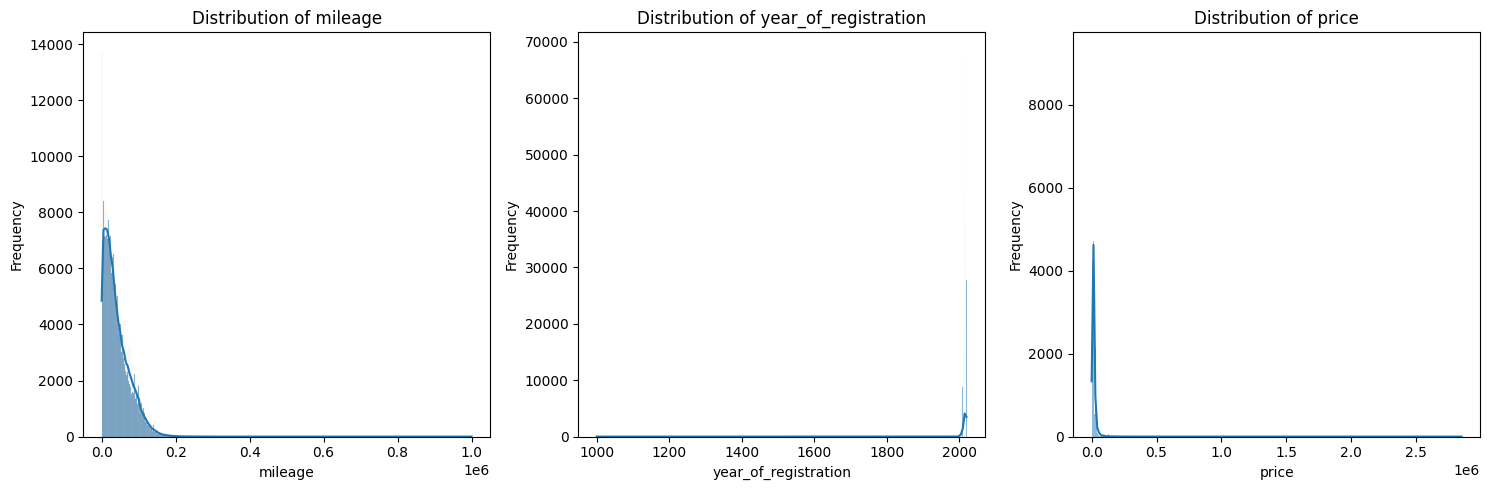

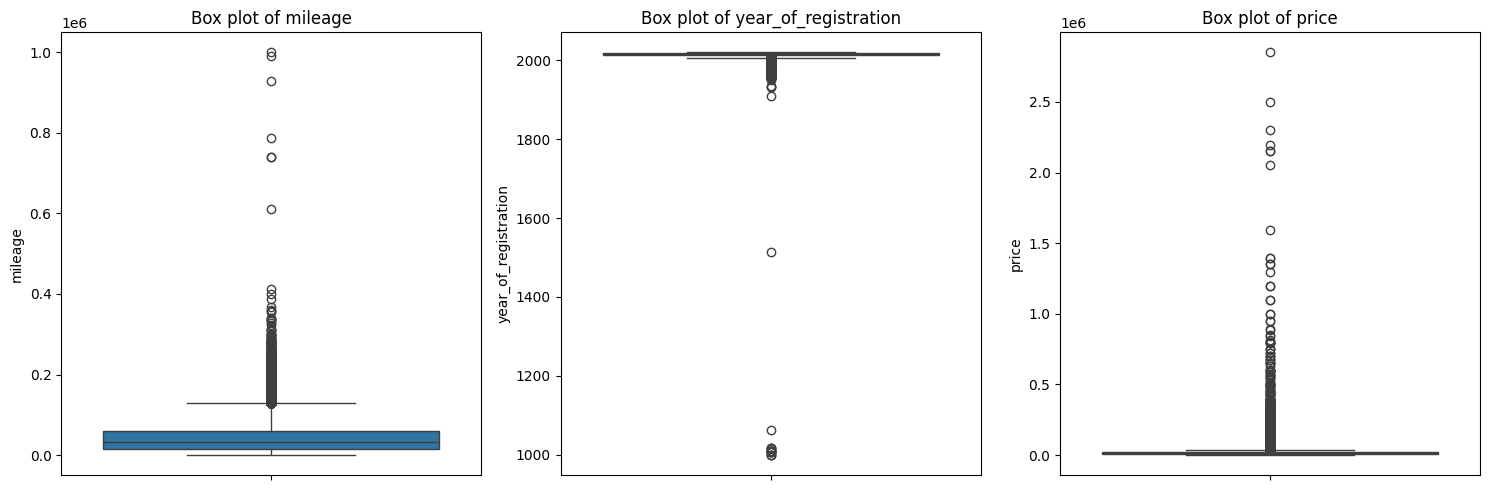

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

quantitative_features_processed = ['mileage', 'year_of_registration', 'price']

# histograms
plt.figure(figsize=(15, 5))
for i, feature in enumerate(quantitative_features_processed):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_processed[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(15, 5))
for i, feature in enumerate(quantitative_features_processed):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df_processed[feature])
    plt.title(f'Box plot of {feature}')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

### Visualizing Qualitative Features
Creating visualizations to understand the distributions of qualitative features (e.g., bar plots for counts).


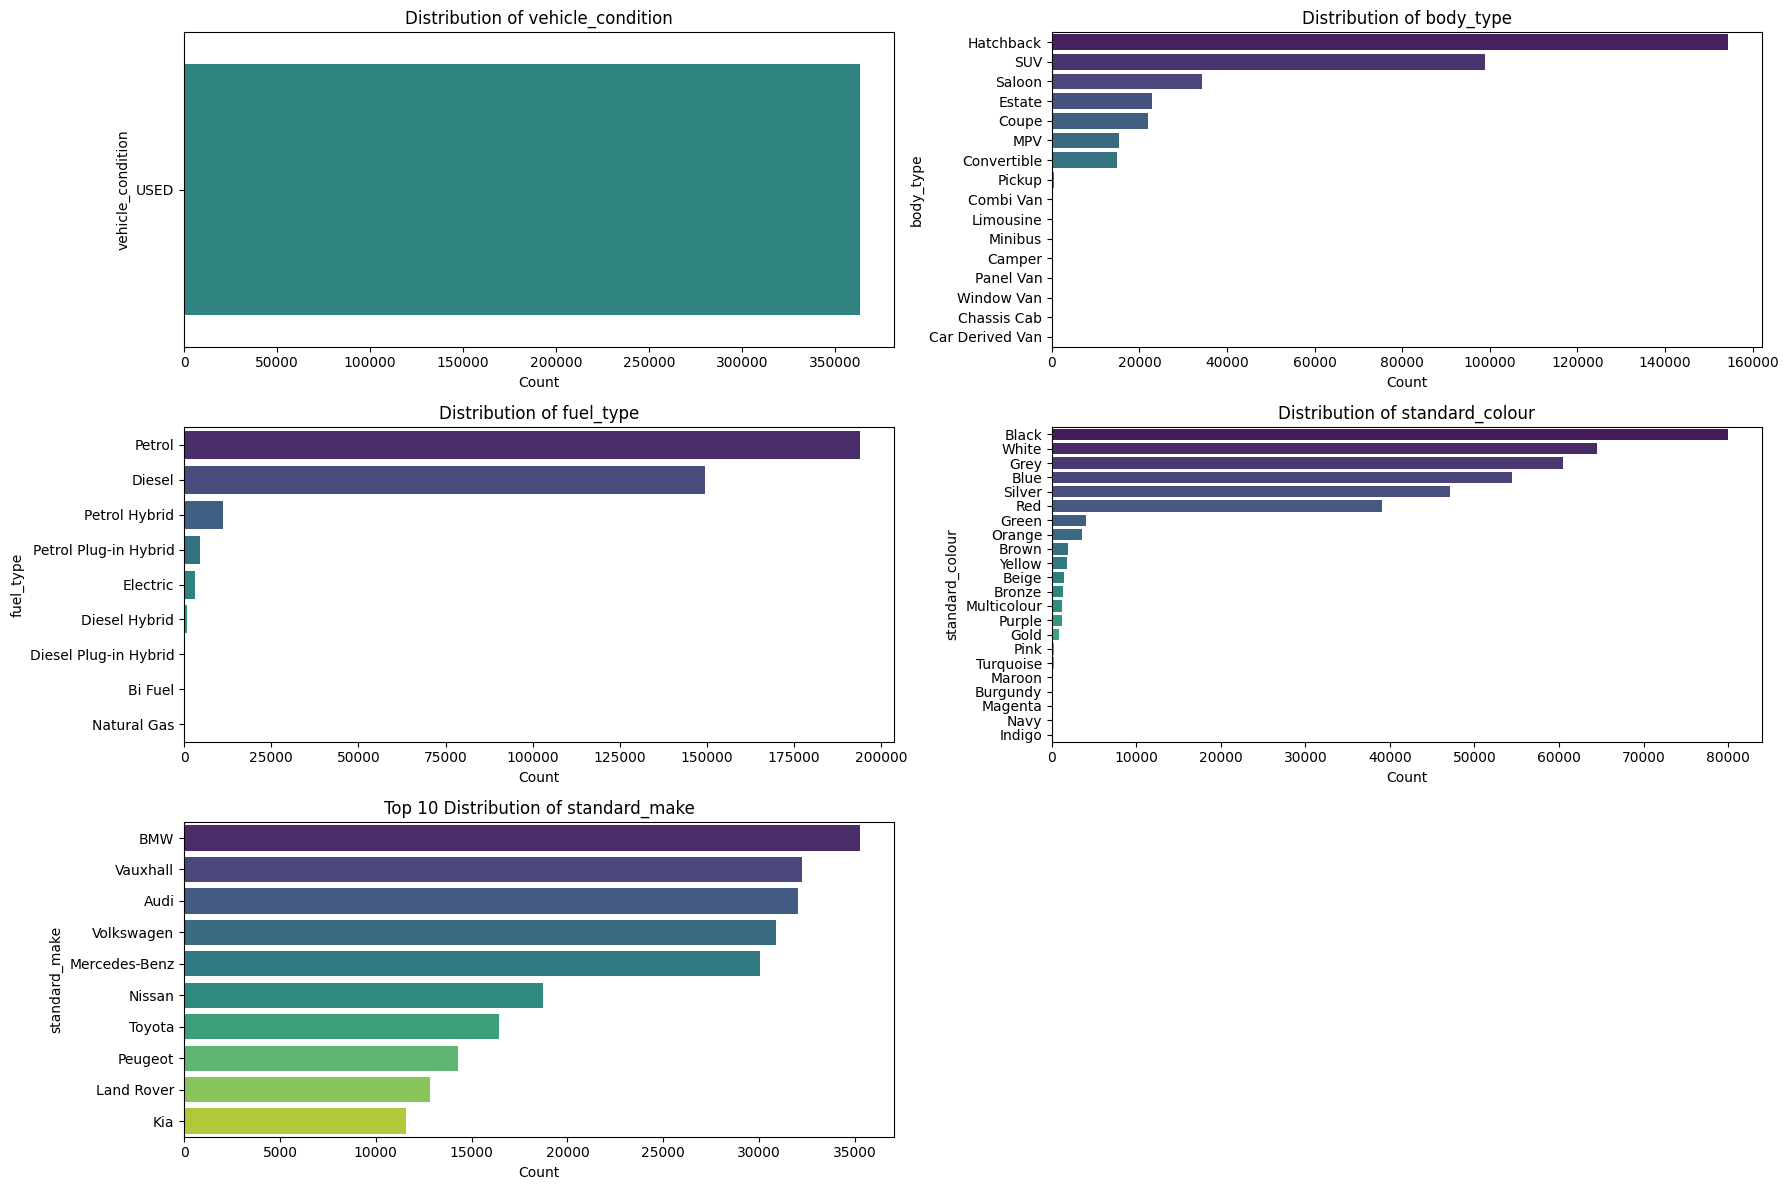

In [ ]:
# selecting key qualitative features for visualization
qualitative_features_to_visualize = [
    'vehicle_condition',
    'body_type',
    'fuel_type',
    'standard_colour',
    'standard_make'
]

# Visualize distributions of selected qualitative features
plt.figure(figsize=(18, 12))

for i, feature in enumerate(qualitative_features_to_visualize):
    plt.subplot(3, 2, i + 1)

    if feature in ['standard_make', 'standard_model']: # Handle features with many categories
        # Get top N categories
        top_n = 10
        top_categories = df_processed[feature].value_counts().nlargest(top_n).index
        df_filtered = df_processed[df_processed[feature].isin(top_categories)]
        sns.countplot(data=df_filtered, y=feature, order=top_categories, palette='viridis')
        plt.title(f'Top {top_n} Distribution of {feature}')
        plt.xlabel('Count')
        plt.ylabel(feature)
    else:
        # Plot all categories for features with fewer unique values
        sns.countplot(data=df_processed, y=feature, order=df_processed[feature].value_counts().index, palette='viridis')
        plt.title(f'Distribution of {feature}')
        plt.xlabel('Count')
        plt.ylabel(feature)

plt.tight_layout()
plt.show()

### Visualizing Relationships Between Quantitative Features
Creating visualizations to explore relationships between quantitative features (e.g., scatter plots, pair plots).


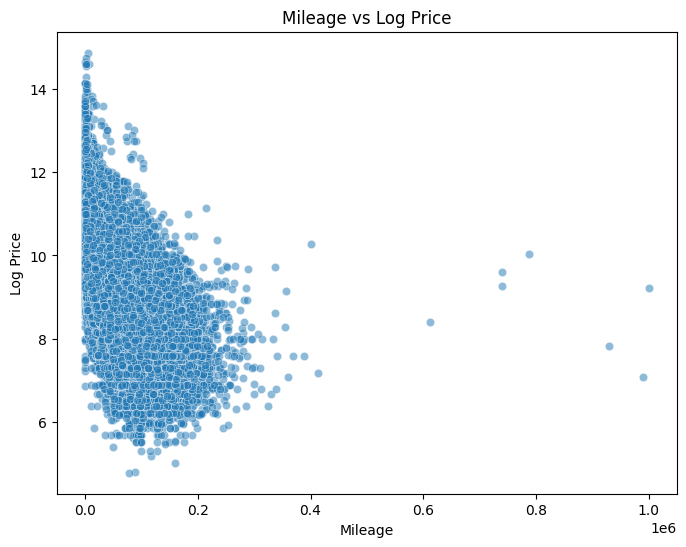

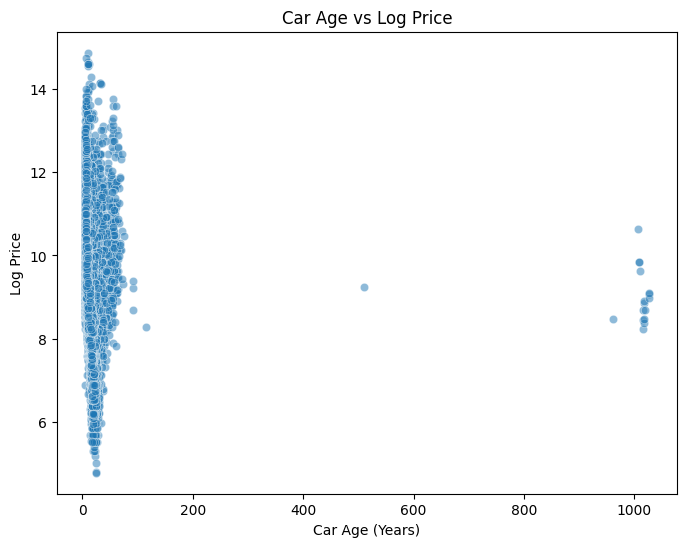

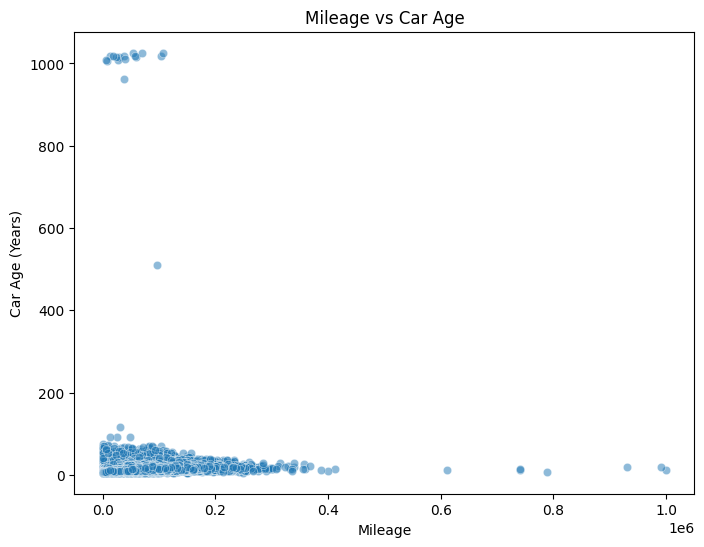

In [ ]:
# scatter plot: mileage vs log_price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_processed, x='mileage', y='log_price', alpha=0.5)
plt.title('Mileage vs Log Price')
plt.xlabel('Mileage')
plt.ylabel('Log Price')
plt.show()

# scatter plot: car_age vs log_price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_processed, x='car_age', y='log_price', alpha=0.5)
plt.title('Car Age vs Log Price')
plt.xlabel('Car Age (Years)')
plt.ylabel('Log Price')
plt.show()

# scatter plot: mileage vs car_age
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_processed, x='mileage', y='car_age', alpha=0.5)
plt.title('Mileage vs Car Age')
plt.xlabel('Mileage')
plt.ylabel('Car Age (Years)')
plt.show()

### Visualizing Relationships Between Qualitative Features
Creating visualizations to explore relationships between qualitative features (e.g., stacked bar plots, heatmaps of counts).


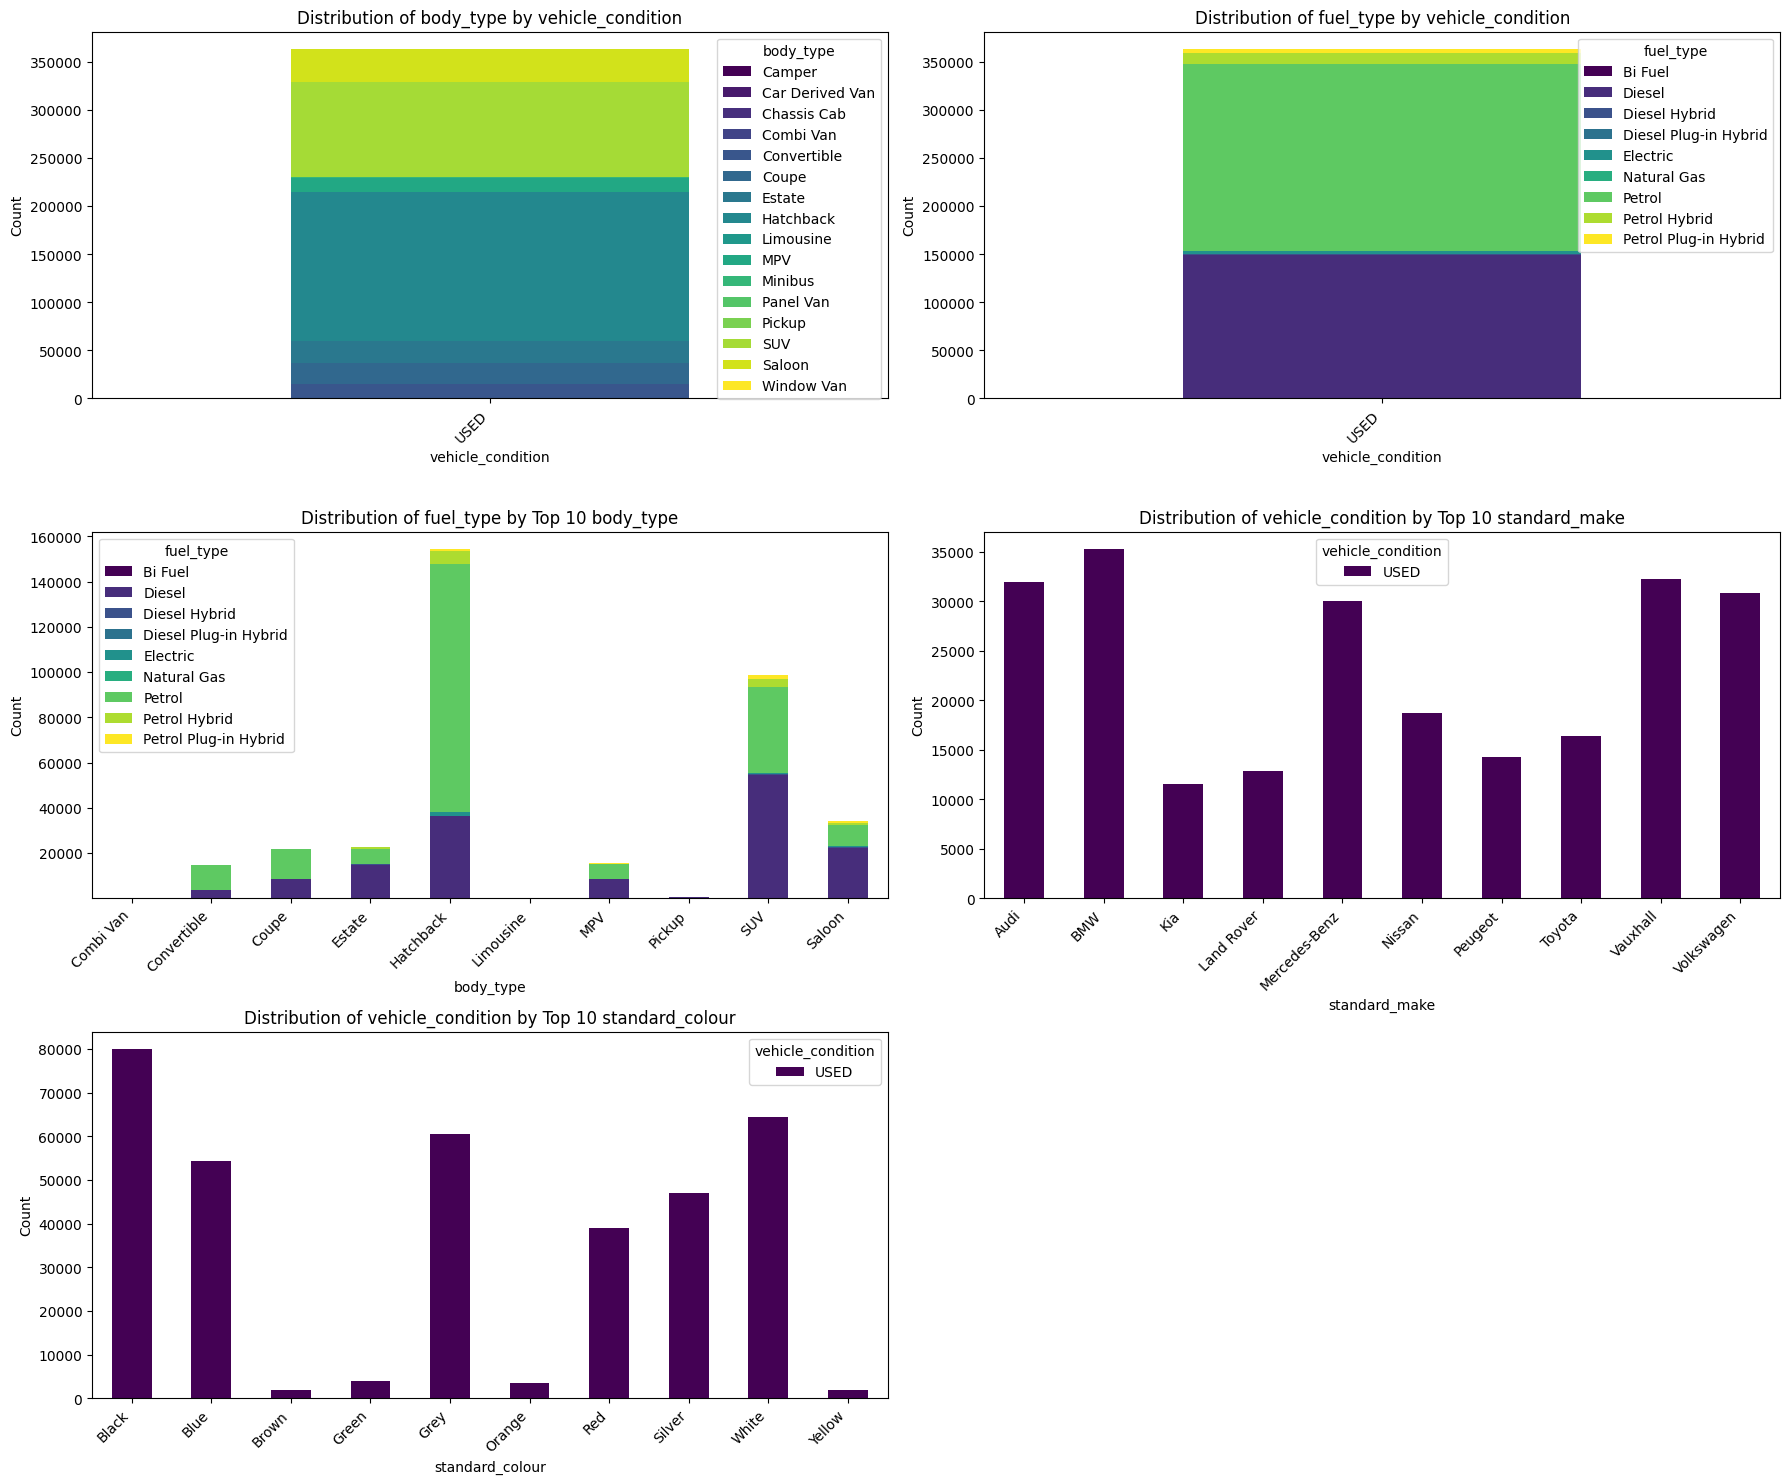

In [ ]:
# selecting pairs of qualitative features for visualization
qualitative_pairs_to_visualize = [
    ('vehicle_condition', 'body_type'),
    ('vehicle_condition', 'fuel_type'),
    ('body_type', 'fuel_type'),
    ('standard_make', 'vehicle_condition'),
    ('standard_colour', 'vehicle_condition')
]

plt.figure(figsize=(18, 15))

for i, (feature1, feature2) in enumerate(qualitative_pairs_to_visualize):
    plt.subplot(3, 2, i + 1)

    # handling features with many categories by focusing on top N for feature1
    if df_processed[feature1].nunique() > 10:
        top_n = 10
        top_categories = df_processed[feature1].value_counts().nlargest(top_n).index
        df_filtered_pair = df_processed[df_processed[feature1].isin(top_categories)]

        # creating a crosstab for stacked bar plot
        ct = pd.crosstab(df_filtered_pair[feature1], df_filtered_pair[feature2])
        ct.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
        plt.title(f'Distribution of {feature2} by Top {top_n} {feature1}')
        plt.xlabel(feature1)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
    else:

        # creating a crosstab for stacked bar plot using all categories
        ct = pd.crosstab(df_processed[feature1], df_processed[feature2])
        ct.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis')
        plt.title(f'Distribution of {feature2} by {feature1}')
        plt.xlabel(feature1)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Visualizing Relationships between Quantitative and Qualitative features
To create visualizations to explore the relationship between quantitative and qualitative features (e.g., box plots or violin plots of quantitative features grouped by qualitative categories).


/tmp/ipython-input-15-2650118216.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_processed, x=qual_feature, y=quant_feature, order=df_processed[qual_feature].value_counts().index, palette='viridis')
/tmp/ipython-input-15-2650118216.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_processed, x=qual_feature, y=quant_feature, order=df_processed[qual_feature].value_counts().index, palette='viridis')
/tmp/ipython-input-15-2650118216.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_processed, x=qual_feature, y=

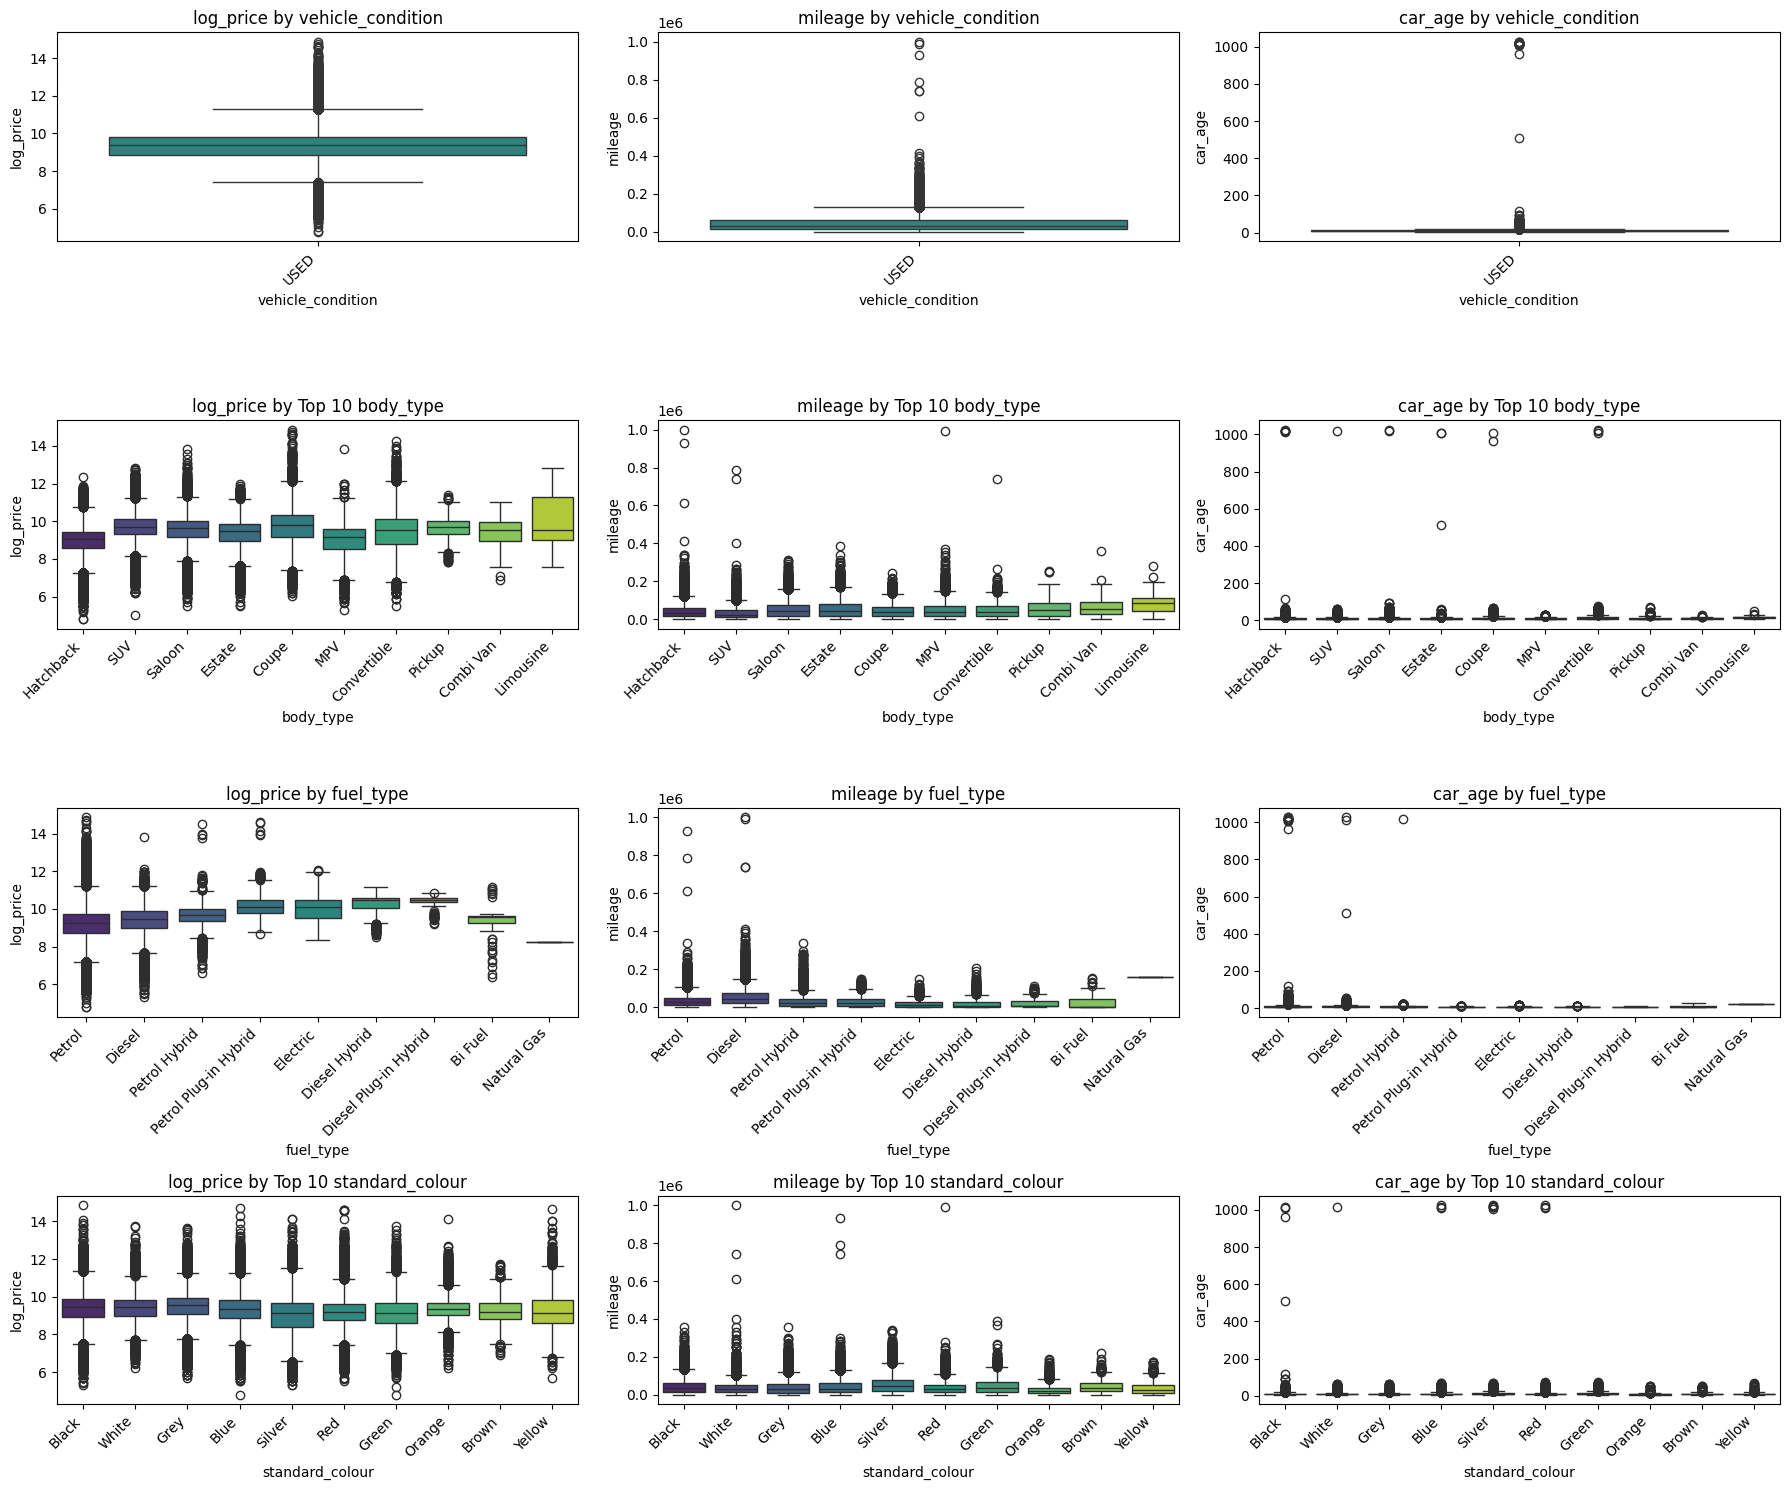

In [ ]:
# selecting key qualitative features with a manageable number of unique values
qualitative_features_for_relationship = [
    'vehicle_condition',
    'body_type',
    'fuel_type',
    'standard_colour',
]

# select quantitative features
quantitative_features_for_relationship = [
    'log_price',
    'mileage',
    'car_age'
]

# create box plots or violin plots
plt.figure(figsize=(18, 15))

plot_index = 1
for qual_feature in qualitative_features_for_relationship:
    for quant_feature in quantitative_features_for_relationship:
        plt.subplot(len(qualitative_features_for_relationship), len(quantitative_features_for_relationship), plot_index)

        # For qualitative features with many categories, focus on top N for better visualization
        if df_processed[qual_feature].nunique() > 10:
            top_n = 10
            top_categories = df_processed[qual_feature].value_counts().nlargest(top_n).index
            df_filtered = df_processed[df_processed[qual_feature].isin(top_categories)]
            sns.boxplot(data=df_filtered, x=qual_feature, y=quant_feature, order=top_categories, palette='viridis')
            plt.title(f'{quant_feature} by Top {top_n} {qual_feature}')
            plt.xticks(rotation=45, ha='right')
        else:
            sns.boxplot(data=df_processed, x=qual_feature, y=quant_feature, order=df_processed[qual_feature].value_counts().index, palette='viridis')
            plt.title(f'{quant_feature} by {qual_feature}')
            plt.xticks(rotation=45, ha='right')

        plt.xlabel(qual_feature)
        plt.ylabel(quant_feature)

        plot_index += 1

plt.tight_layout()
plt.show()

## Visualizing Relationships with Target Variable
To create visualizations specifically to explore the relationships between features and the target variable 'price' (e.g., scatter plots of quantitative features vs. price, box plots of price by qualitative categories).


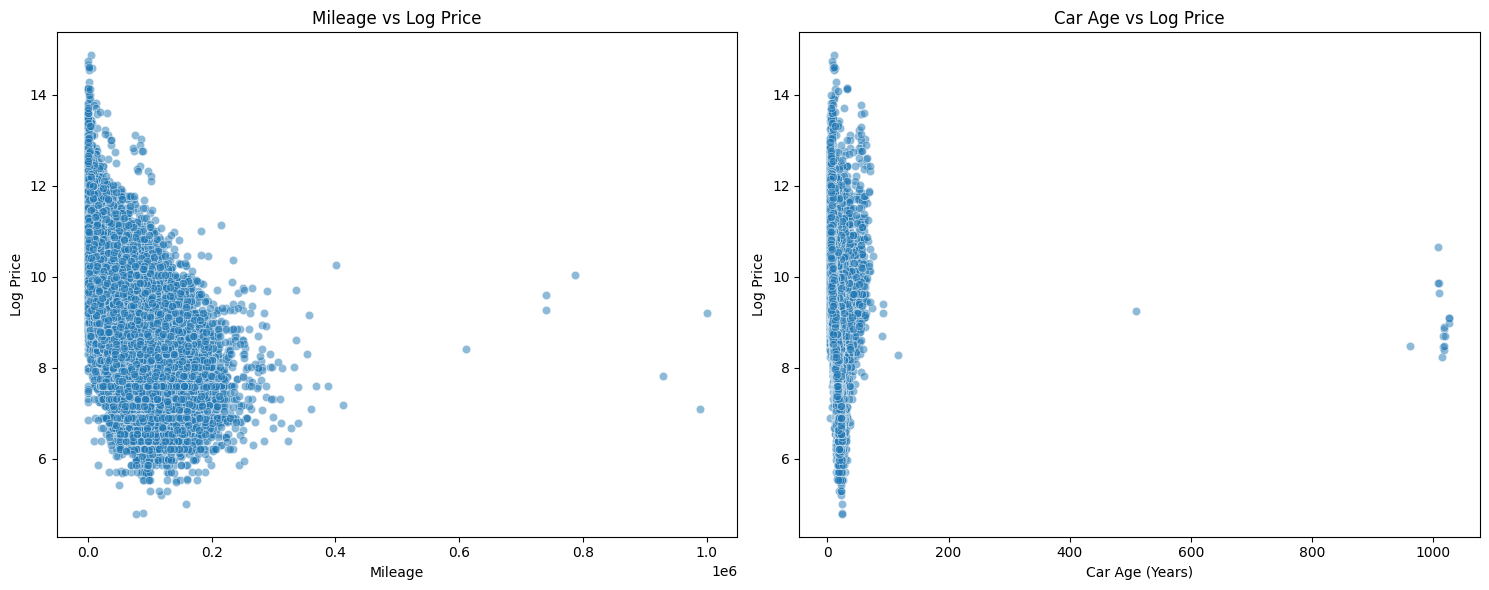

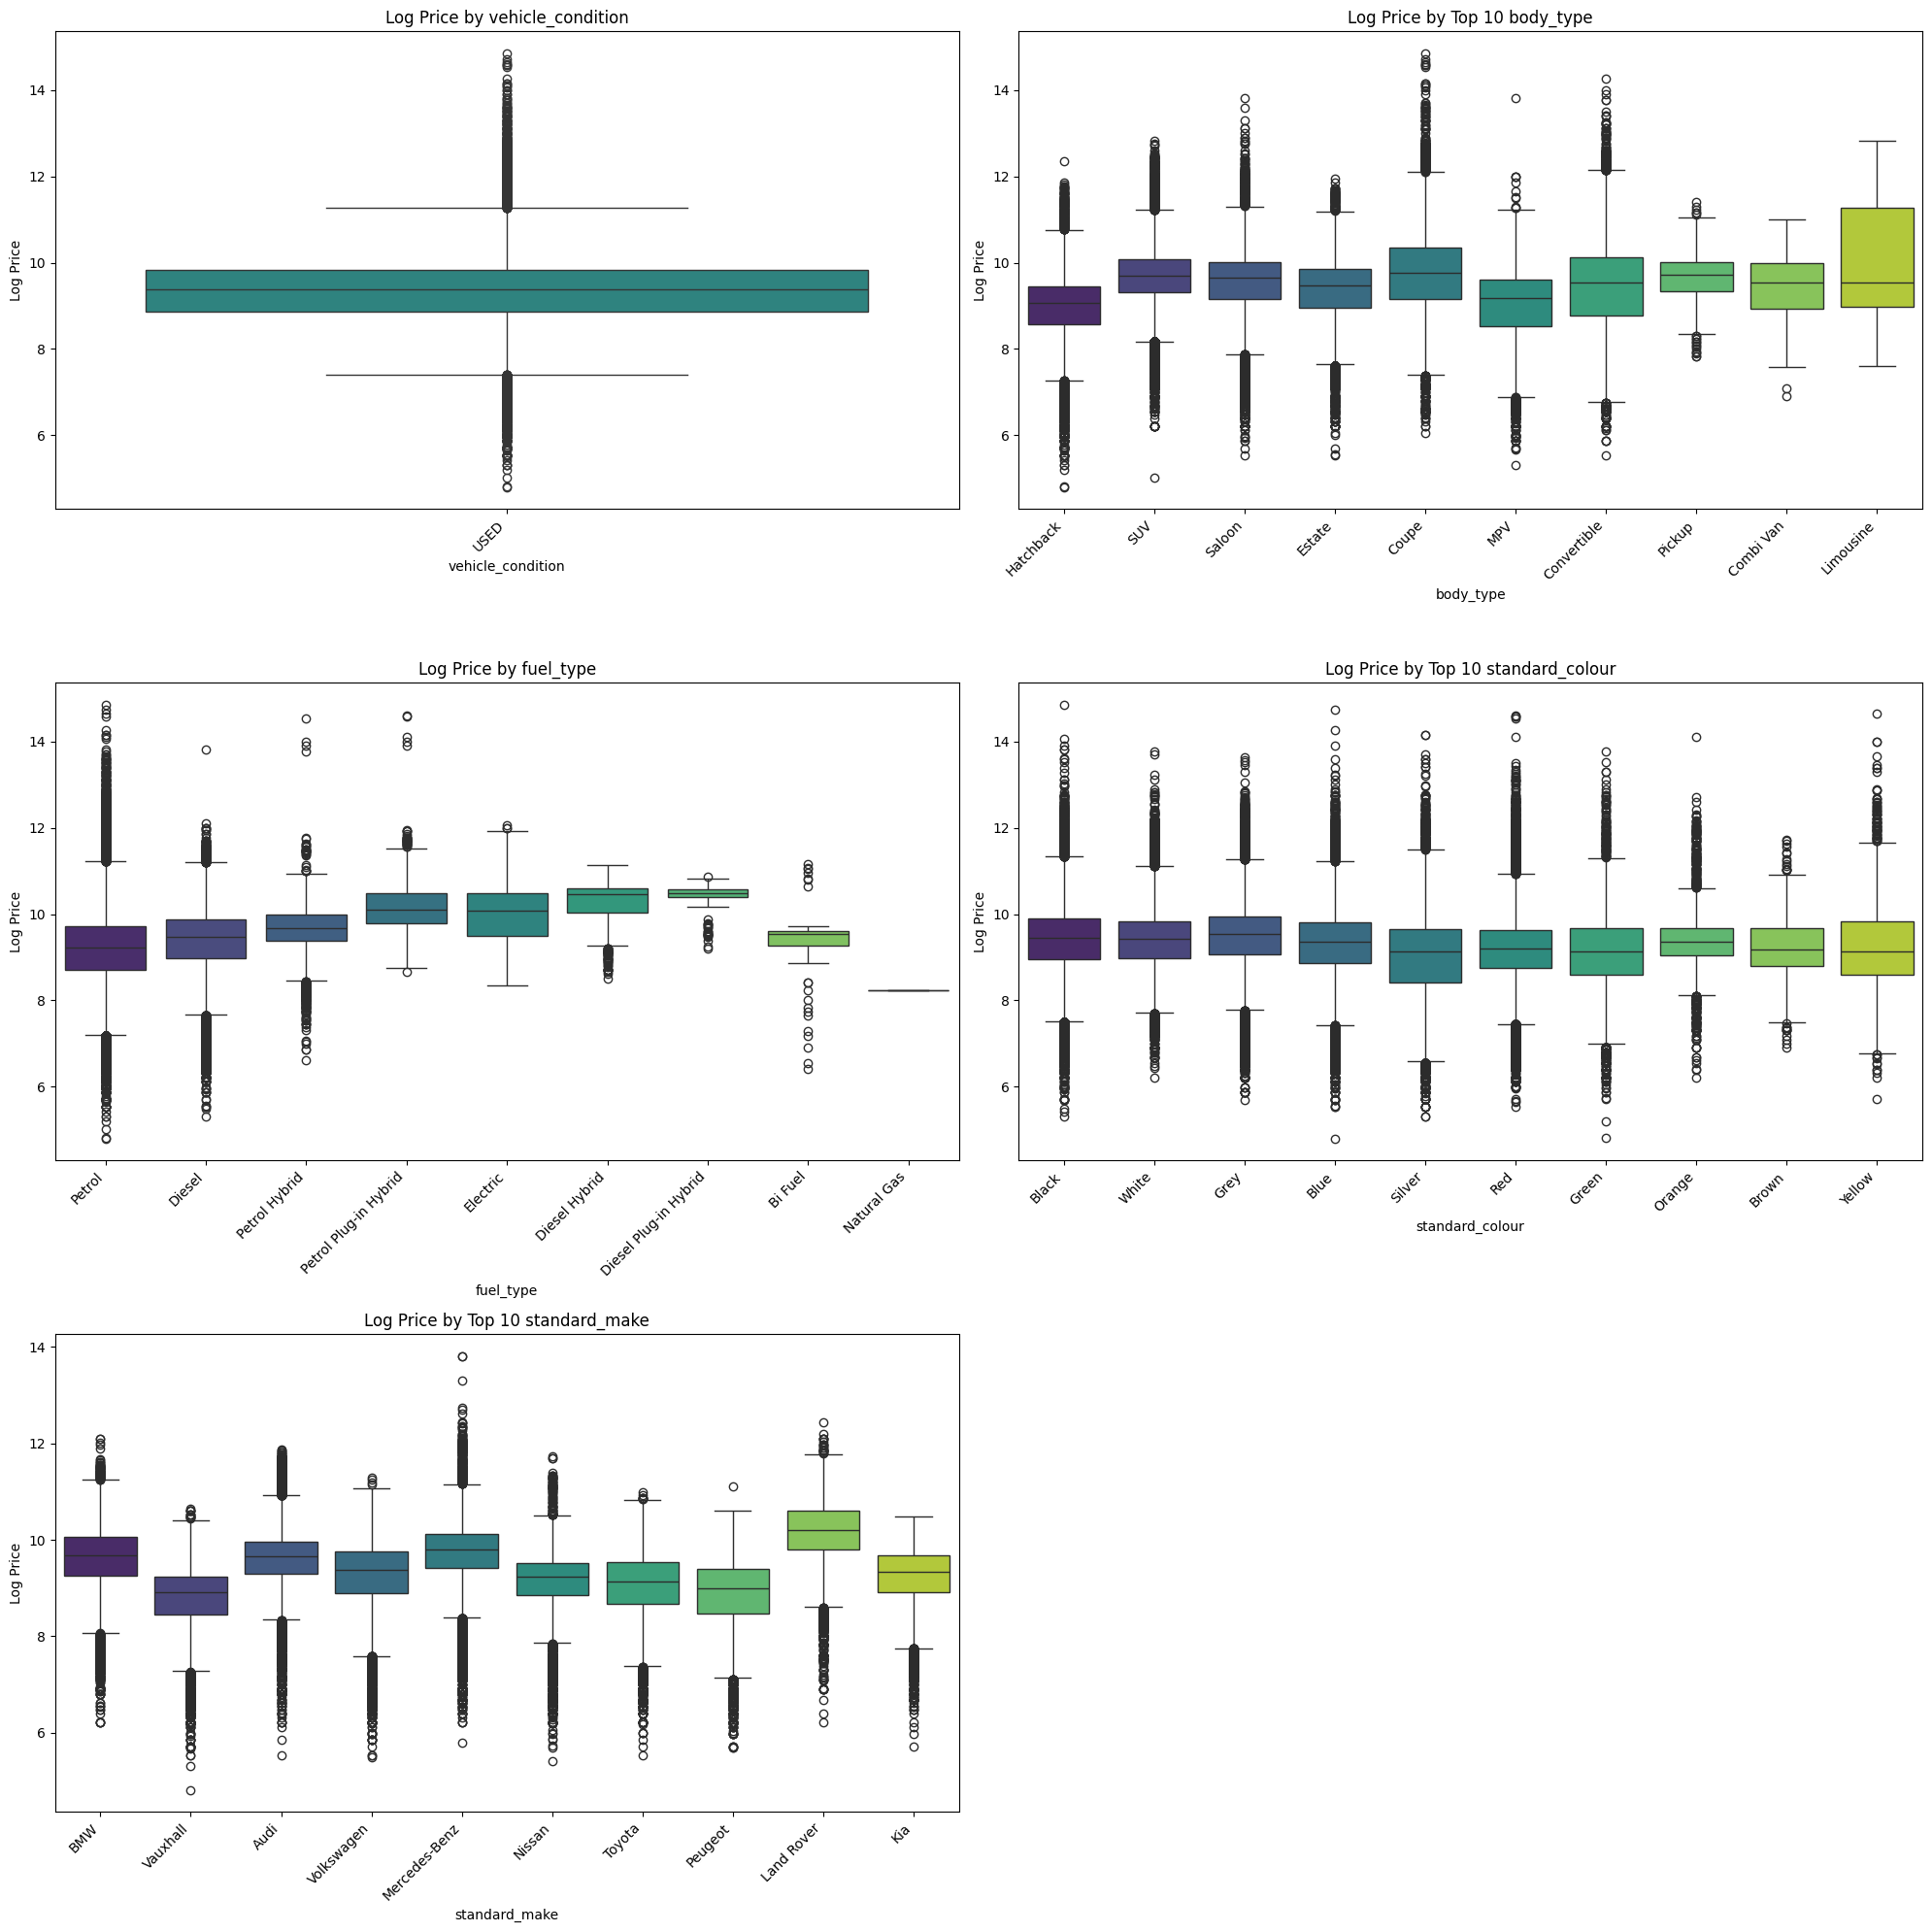

In [ ]:
# creating scatter plots of quantitative features vs. log_price
plt.figure(figsize=(15, 6))

# scatter plot: mileage vs log_price
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_processed, x='mileage', y='log_price', alpha=0.5)
plt.title('Mileage vs Log Price')
plt.xlabel('Mileage')
plt.ylabel('Log Price')

# ccatter plot: car_age vs log_price
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_processed, x='car_age', y='log_price', alpha=0.5)
plt.title('Car Age vs Log Price')
plt.xlabel('Car Age (Years)')
plt.ylabel('Log Price')

plt.tight_layout()
plt.show()


# select key qualitative features for visualizing relationship with log_price
qualitative_features_for_price_relationship = [
    'vehicle_condition',
    'body_type',
    'fuel_type',
    'standard_colour',
    'standard_make'
]

# create box plots of log_price by qualitative categories
plt.figure(figsize=(20, 20))

plot_index = 1
for qual_feature in qualitative_features_for_price_relationship:
    plt.subplot(3, 2, plot_index)

    # handle features with many categories by focusing on top N for better visualization
    if df_processed[qual_feature].nunique() > 10:
        top_n = 10
        top_categories = df_processed[qual_feature].value_counts().nlargest(top_n).index
        df_filtered = df_processed[df_processed[qual_feature].isin(top_categories)].copy() # Use .copy() to avoid SettingWithCopyWarning
        sns.boxplot(data=df_filtered, x=qual_feature, y='log_price', order=top_categories, palette='viridis')
        plt.title(f'Log Price by Top {top_n} {qual_feature}')
        plt.xticks(rotation=45, ha='right')
    else:
        sns.boxplot(data=df_processed, x=qual_feature, y='log_price', order=df_processed[qual_feature].value_counts().index, palette='viridis')
        plt.title(f'Log Price by {qual_feature}')
        plt.xticks(rotation=45, ha='right')

    plt.xlabel(qual_feature)
    plt.ylabel('Log Price')

    plot_index += 1

plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Quantitative Feature Distributions:** Histograms and box plots showed the distributions of `mileage`, `year_of_registration`, and `price`. These visualizations highlighted the spread and central tendency of these numerical features, along with the presence of outliers, particularly in `price`.
*   **Qualitative Feature Distributions:** Bar plots illustrated the counts of categories for `vehicle_condition`, `body_type`, `fuel_type`, `standard_colour`, and `standard_make`. The visualization for `standard_make` focused on the top 10 categories due to the large number of unique values, showing the most frequent car makes in the dataset.
*   **Relationships Between Quantitative Features:** Scatter plots revealed relationships between quantitative features. A negative correlation was observed between `mileage` and `log_price`, and between `car_age` and `log_price`, suggesting that older cars or cars with higher mileage tend to have lower prices. A positive correlation was observed between `mileage` and `car_age`, as expected.
*   **Relationships Between Qualitative Features:** Stacked bar plots displayed the distribution of one qualitative feature across the categories of another. These plots provided insights into the co-occurrence patterns, such as how `vehicle_condition` varies across different `body_type` or `fuel_type`. For features with many categories, the analysis focused on the top 10 categories for the primary feature in the pair.
*   **Relationships with Target Variable (Log Price):**
    *   Scatter plots confirmed the negative relationships between `log_price` and both `mileage` and `car_age`.
    *   Box plots showed the distribution of `log_price` across categories of qualitative features like `vehicle_condition`, `body_type`, `fuel_type`, `standard_colour`, and `standard_make`. These plots indicated that the median and spread of `log_price` vary significantly based on these categorical attributes, highlighting their potential influence on price. For `standard_colour` and `standard_make`, the plots focused on the top 10 categories, showing price variations among the most common colours and makes.

### Insights or Next Steps

*   The visual analysis confirms that `mileage`, `car_age`, `vehicle_condition`, `body_type`, `fuel_type`, `standard_colour`, and `standard_make` are important features that exhibit relationships with the car price.
*   Further analysis could involve quantifying the strength of the observed relationships (e.g., using correlation coefficients for quantitative features or ANOVA for qualitative features vs. price) and considering feature engineering based on the insights gained (e.g., grouping less frequent categories).


## Outlier Identification
- Although dataset is preprocessed, still it has a lot of outliers that need to be removed. This step is used to identify outliers in the quantitative features using appropriate methods (e.g., IQR method or Z-scores).
- Outliers in the quantitative features will be removed using the IQR method by calculating the IQR and bounds for each feature and finding the indices of values outside these bounds.


In [ ]:
# select quantitative features from the processed DataFrame
quantitative_features_processed = ['mileage', 'car_age', 'log_price']

outlier_indices = {}

for feature in quantitative_features_processed:
    Q1 = df_processed[feature].quantile(0.25)
    Q3 = df_processed[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # identify outliers
    feature_outlier_indices = df_processed[(df_processed[feature] < lower_bound) | (df_processed[feature] > upper_bound)].index
    outlier_indices[feature] = feature_outlier_indices

# display the number of outliers found for each feature
for feature, indices in outlier_indices.items():
    print(f"Number of outliers in '{feature}': {len(indices)}")

Number of outliers in 'mileage': 7363
Number of outliers in 'car_age': 11412
Number of outliers in 'log_price': 12897


In [ ]:
# combine outlier indices from all quantitative features
all_outlier_indices = pd.Index([])
for feature, indices in outlier_indices.items():
    all_outlier_indices = all_outlier_indices.union(indices)

print(f"\nTotal number of unique outlier indices across all quantitative features: {len(all_outlier_indices)}")


Total number of unique outlier indices across all quantitative features: 24698


## Removing Outliers
After identification, the identified outliers will be from the dataset.


In [ ]:
df_cleaned = df_processed.drop(all_outlier_indices)

print("Shape of original processed DataFrame:", df_processed.shape)
print("Shape of cleaned DataFrame:", df_cleaned.shape)

Shape of original processed DataFrame: (363697, 13)
Shape of cleaned DataFrame: (338999, 13)


### Confirming outlier removal

,mileage,car_age,log_price
count,338999.000000,338999.000000,338999.000000
mean,37170.105525,9.312662,9.372146
std,29078.862570,3.207436,0.692804
min,0.000000,5.000000,7.396335
25%,14000.000000,7.000000,8.948326
50%,30000.000000,8.000000,9.392662
75%,54787.000000,11.000000,9.825526
max,128123.000000,19.000000,11.282757


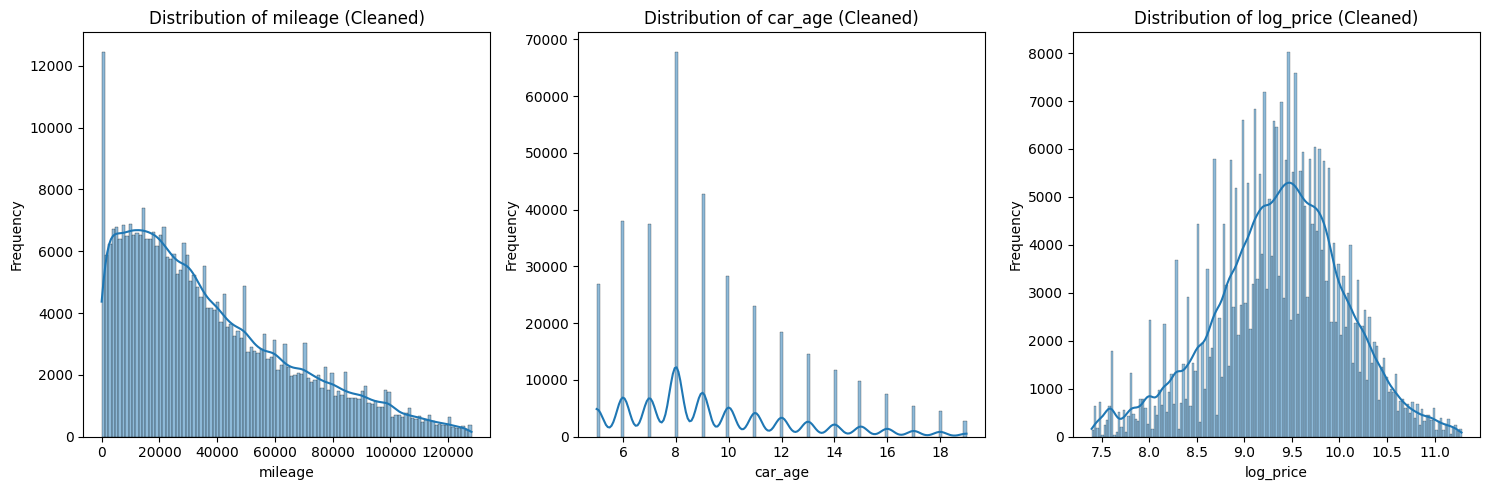

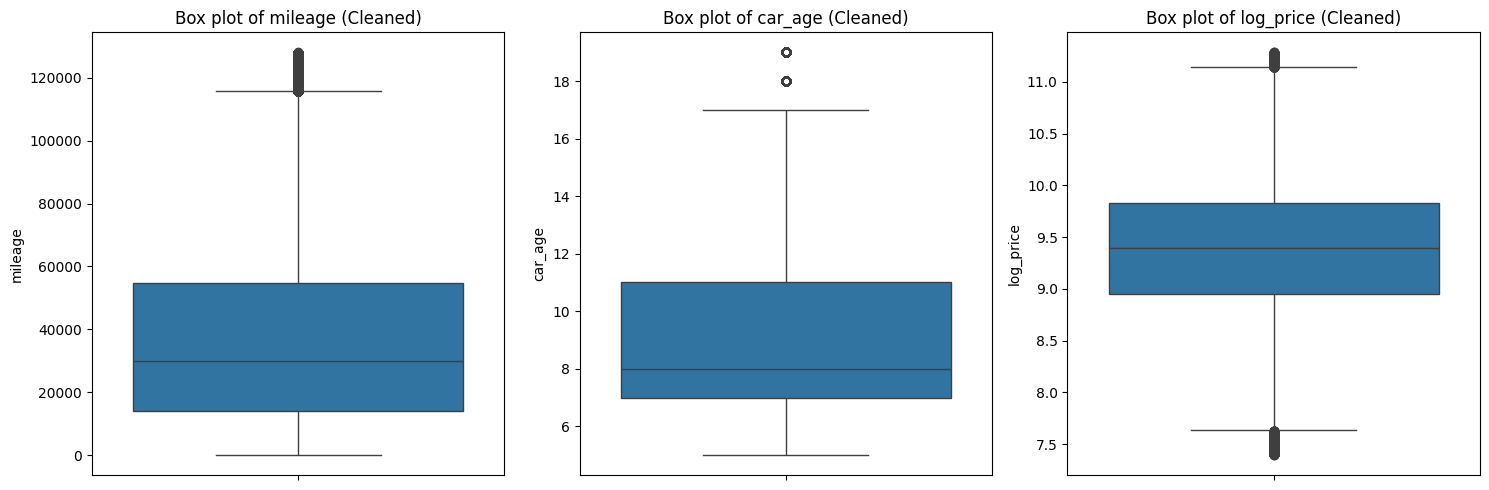

In [ ]:
# calculate and display descriptive statistics for quantitative features of the cleaned DataFrame
quantitative_features_cleaned = ['mileage', 'car_age', 'log_price']
display(df_cleaned[quantitative_features_cleaned].describe())

# create histograms for quantitative features of the cleaned DataFrame
plt.figure(figsize=(15, 5))
for i, feature in enumerate(quantitative_features_cleaned):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_cleaned[feature], kde=True)
    plt.title(f'Distribution of {feature} (Cleaned)')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# create box plots for quantitative features of the cleaned DataFrame
plt.figure(figsize=(15, 5))
for i, feature in enumerate(quantitative_features_cleaned):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df_cleaned[feature])
    plt.title(f'Box plot of {feature} (Cleaned)')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

### Summary of Outlier Identification & Removal Step

#### Data Analysis Key Findings

*   Outliers were identified in the 'mileage', 'car_age', and 'log\_price' features using the Interquartile Range (IQR) method.
*   A total of 24698 unique outlier indices were identified across these features.
*   Removing the identified outliers reduced the number of rows in the dataset from 363697 to 338999, confirming the removal of the 24698 outlier rows.
*   After outlier removal, the descriptive statistics for the quantitative features showed a significant reduction in maximum values and a more concentrated distribution, as visually confirmed by the histograms and box plots.

### Insights or Next Steps

*   The cleaned dataset is now more suitable for further analysis and modeling as extreme values that could skew results have been removed.
*   Consider investigating the characteristics of the removed outliers to understand if they represent a distinct segment of the data or are simply data entry errors.


In [ ]:
# number of outliers is the difference between the original processed dataframe shape and the cleaned dataframe shape
num_outliers = df_processed.shape[0] - df_cleaned.shape[0]
print(f"Number of outliers removed from the dataset: {num_outliers}")

Number of outliers removed from the dataset: 24698


In [ ]:
from sklearn.preprocessing import LabelEncoder

# select the qualitative features that need encoding
qualitative_features_to_encode = [
    'vehicle_condition',
    'body_type',
    'fuel_type',
    'standard_colour',
    'standard_make',
    'crossover_car_and_van',
    'standard_model'
]

# create a copy to avoid modifying the original cleaned DataFrame directly
df_encoded = df_cleaned.copy()

# apply Label Encoding to each selected qualitative feature
for feature in qualitative_features_to_encode:
    le = LabelEncoder()
    df_encoded[feature + '_encoded'] = le.fit_transform(df_encoded[feature])
    print(f"Applied Label Encoding to '{feature}'. Created '{feature}_encoded' column.")

    if df_encoded[feature].nunique() < 20:
        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(f"  Mapping for '{feature}': {mapping}")

# dropping the original qualitative features
df_encoded = df_encoded.drop(columns=qualitative_features_to_encode)

# Display the head of the new DataFrame with encoded features
print("\nDataFrame after Label Encoding:")
display(df_encoded.head())

# Display info to see the new encoded columns and their data types
print("\nInfo of the DataFrame after Label Encoding:")
display(df_encoded.info())

Applied Label Encoding to 'vehicle_condition'. Created 'vehicle_condition_encoded' column.
  Mapping for 'vehicle_condition': {'USED': np.int64(0)}
Applied Label Encoding to 'body_type'. Created 'body_type_encoded' column.
  Mapping for 'body_type': {'Camper': np.int64(0), 'Car Derived Van': np.int64(1), 'Chassis Cab': np.int64(2), 'Combi Van': np.int64(3), 'Convertible': np.int64(4), 'Coupe': np.int64(5), 'Estate': np.int64(6), 'Hatchback': np.int64(7), 'Limousine': np.int64(8), 'MPV': np.int64(9), 'Minibus': np.int64(10), 'Panel Van': np.int64(11), 'Pickup': np.int64(12), 'SUV': np.int64(13), 'Saloon': np.int64(14), 'Window Van': np.int64(15)}
Applied Label Encoding to 'fuel_type'. Created 'fuel_type_encoded' column.
  Mapping for 'fuel_type': {'Bi Fuel': np.int64(0), 'Diesel': np.int64(1), 'Diesel Hybrid': np.int64(2), 'Diesel Plug-in Hybrid': np.int64(3), 'Electric': np.int64(4), 'Petrol': np.int64(5), 'Petrol Hybrid': np.int64(6), 'Petrol Plug-in Hybrid': np.int64(7)}
Applied Labe

,public_reference,mileage,year_of_registration,price,car_age,log_price,vehicle_condition_encoded,body_type_encoded,fuel_type_encoded,standard_colour_encoded,standard_make_encoded,crossover_car_and_van_encoded,standard_model_encoded
1,202007020778260,108230.0,2011.0,7000,14.0,8.853665,0,14,1,2,36,0,751
2,202007020778474,7800.0,2017.0,14000,8.0,9.546813,0,13,5,8,68,0,761
3,202007080986776,45000.0,2016.0,7995,9.0,8.986572,0,7,1,4,78,0,468
4,202007161321269,64000.0,2015.0,26995,10.0,10.203407,0,13,1,8,41,0,566
5,202009304412074,16000.0,2017.0,29000,8.0,10.275051,0,4,5,2,7,0,592



Info of the DataFrame after Label Encoding:
<class 'pandas.core.frame.DataFrame'>
Index: 338999 entries, 1 to 402004
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   public_reference               338999 non-null  int64  
 1   mileage                        338999 non-null  float64
 2   year_of_registration           338999 non-null  float64
 3   price                          338999 non-null  int64  
 4   car_age                        338999 non-null  float64
 5   log_price                      338999 non-null  float64
 6   vehicle_condition_encoded      338999 non-null  int64  
 7   body_type_encoded              338999 non-null  int64  
 8   fuel_type_encoded              338999 non-null  int64  
 9   standard_colour_encoded        338999 non-null  int64  
 10  standard_make_encoded          338999 non-null  int64  
 11  crossover_car_and_van_encoded  338999 non-null  int

None

## Train/Test Split

In [ ]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(271199, 12)
(67800, 12)
(271199,)
(67800,)


## Applying Machine Learning Models
### Function `evaluate_and_visualize ()`
    """
    Fits a regression model, predicts, calculates metrics, and visualizes results.

    Args:
    name: Name of the model (string).
    model: The regression model instance.
    X_train: Training features.
    X_test: Testing features.
    y_train: Training target.
    y_test: Testing target.
    
    """

In [ ]:
def evaluate_and_visualize(name, model, X_train, X_test, y_train, y_test):

  print(f"Evaluating {name} Model:")

  # fit the model
  model.fit(X_train, y_train)

  # predict on the test data
  y_pred = model.predict(X_test)

  # calculate evaluation metrics
  r2 = r2_score(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mse)

  # print the evaluation metrics
  print(f"  R-squared: {r2:.4f}")
  print(f"  Mean Squared Error (MSE): {mse:.4f}")
  print(f"  Mean Absolute Error (MAE): {mae:.4f}")
  print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
  print("-" * 50)

  # --- Visualization ---
  plt.figure(figsize=(12, 6))

  # scatter plot of Actual vs. Predicted Prices
  plt.subplot(1, 2, 1)
  plt.scatter(y_test, y_pred, alpha=0.3)
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Ideal line
  plt.xlabel("Actual Price")
  plt.ylabel("Predicted Price")
  plt.title(f"{name}: Actual vs. Predicted Prices")

  # residual Plot
  residuals = y_test - y_pred
  plt.subplot(1, 2, 2)
  sns.histplot(residuals, kde=True)
  plt.xlabel("Residuals (Actual - Predicted)")
  plt.ylabel("Frequency")
  plt.title(f"{name}: Distribution of Residuals")

  plt.tight_layout()
  plt.show()

  return r2, mae

### Applying XGBoost Regressor

Evaluating XGBoost Regressor Model:
  R-squared: 0.9991
  Mean Squared Error (MSE): 96814.9844
  Mean Absolute Error (MAE): 84.5757
  Root Mean Squared Error (RMSE): 311.1511
--------------------------------------------------


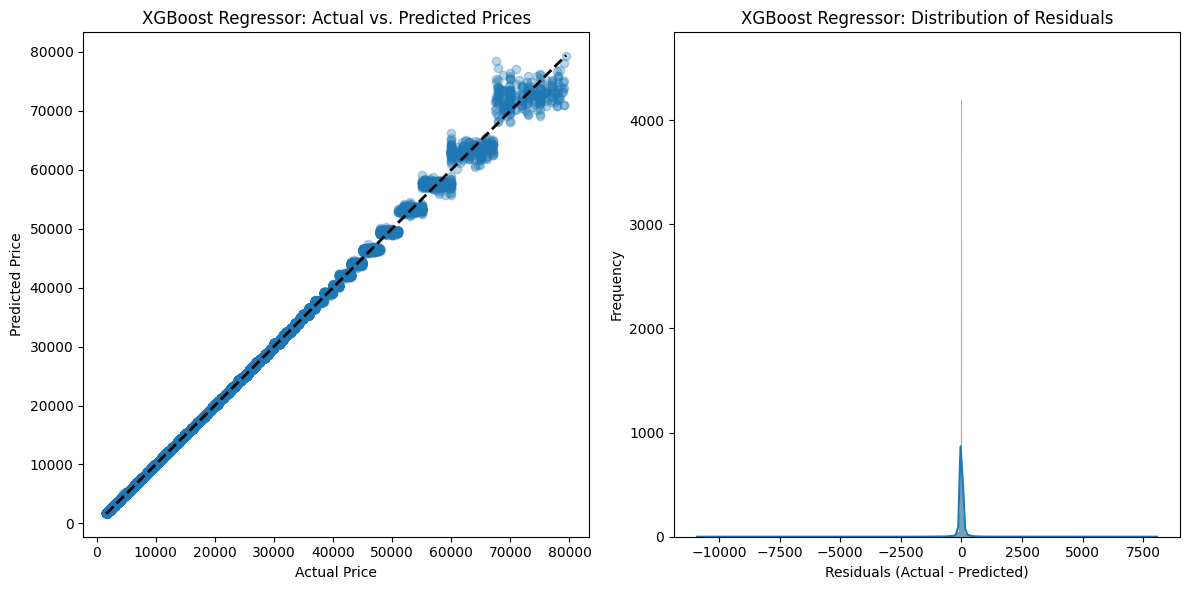

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

xgb = XGBRegressor()
r2_xgb, mae_xgb = evaluate_and_visualize("XGBoost Regressor", xgb,
                       X_train, X_test,
                       y_train, y_test)

### Applying LGBM Regressor

Evaluating LightGBM Regressor Model:
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1132
[LightGBM] [Info] Number of data points in the train set: 271199, number of used features: 11
[LightGBM] [Info] Start training from score 14799.104458
  R-squared: 0.9996
  Mean Squared Error (MSE): 49510.0398
  Mean Absolute Error (MAE): 62.2467
  Root Mean Squared Error (RMSE): 222.5085
--------------------------------------------------


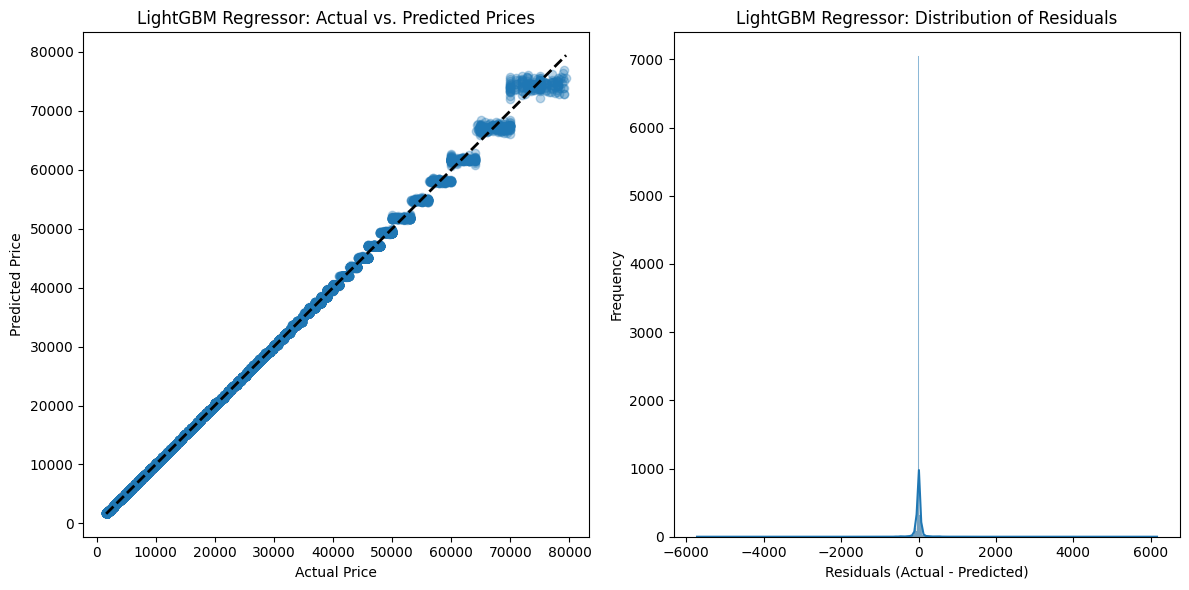

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()

# applying lgbm model
r2_lgbm, mae_lgbm = evaluate_and_visualize("LightGBM Regressor",
                          lgbm,
                          X_train, X_test,
                          y_train, y_test)

## Model Evaluation

Model Performance Comparison:
----------------------------------------
XGBoost Regressor:
  R-squared: 0.9991
  MAE: 84.5757
----------------------------------------
LightGBM Regressor:
  R-squared: 0.9996
  MAE: 62.2467
----------------------------------------


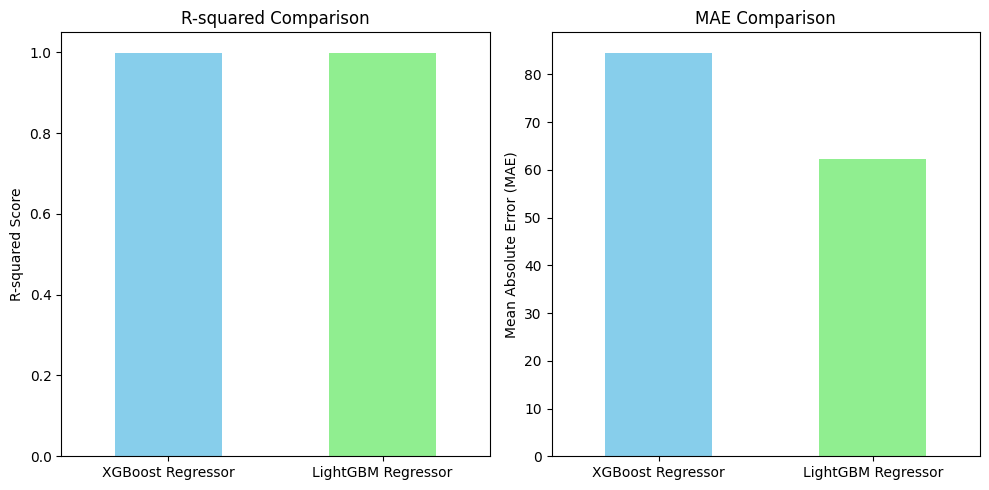


Conclusion:
Based on the R-squared and MAE values, the LightGBM Regressor appears to be the better performing model.
It achieved a higher R-squared (0.9996), indicating it explains more of the variance in the target variable.
It also achieved a lower MAE (62.2467), indicating that its predictions are, on average, closer to the actual values.


In [ ]:
# collect results for comparison
model_performance = {
    "XGBoost Regressor": {"R2": r2_xgb, "MAE": mae_xgb},
    "LightGBM Regressor": {"R2": r2_lgbm, "MAE": mae_lgbm}
}

# print a summary table
print("Model Performance Comparison:")
print("-" * 40)
for model_name, metrics in model_performance.items():
    print(f"{model_name}:")
    print(f"  R-squared: {metrics['R2']:.4f}")
    print(f"  MAE: {metrics['MAE']:.4f}")
    print("-" * 40)

# visualize the comparison
performance_df = pd.DataFrame(model_performance).T

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
performance_df['R2'].plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('R-squared Comparison')
plt.ylabel('R-squared Score')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
performance_df['MAE'].plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('MAE Comparison')
plt.ylabel('Mean Absolute Error (MAE)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# conclusion
best_model = performance_df['R2'].idxmax()
print(f"\nConclusion:")
print(f"Based on the R-squared and MAE values, the {best_model} appears to be the better performing model.")
print(f"It achieved a higher R-squared ({model_performance[best_model]['R2']:.4f}), indicating it explains more of the variance in the target variable.")
print(f"It also achieved a lower MAE ({model_performance[best_model]['MAE']:.4f}), indicating that its predictions are, on average, closer to the actual values.")
